# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [743]:
import math


def jarvismarch(inputSet):
        '''
        Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
        '''
        
        if len(inputSet) == 0:
                return

        def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
                cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])
                if cross_product > 0:
                        return 1 # counter clockwise
                elif cross_product < 0:
                        return -1 # clockwise
                else: # cross_product == 0
                        return 0 # collinear

        leftmost = min(inputSet, key=lambda p: (p[1], p[0]))
        outputSet = []
        outputSet.append(leftmost)
        current = leftmost
        iterator = 0
        while True:
                end = inputSet[0]
                for point in inputSet:
                        if point == current:
                                continue
                        numDirection = direction(current, end, point)
                        if numDirection == -1:
                                end = point
                        elif numDirection == 0: 
                                if math.sqrt((point[0] - current[0])**2 + (point[1] - current[1])**2) > math.sqrt((end[0] - current[0])**2 + (end[1] - current[1])**2): #if the points are colinear, take the one further away from current
                                        end = point
                iterator += 1
                outputSet.append(end)
                current = end
                if end == outputSet[0]:
                        break

        return outputSet


  

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [744]:
def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE
    def calcPolarAngle(point: tuple, origin: tuple) -> float:
        x, y = point
        oX, oY = origin
        return math.atan2(y-oY, x-oX)

    def sortByAngle(points: [], origin: tuple):
        points.sort(key=lambda point: (calcPolarAngle(point, origin), point[0], -point[1]))
        
    def removeDuplicates(points: []):
        points = list(dict.fromkeys(points))

    def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
        cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])

        if cross_product > 0:
            return 1 # counter clockwise
        elif cross_product < 0:
            return -1 # clockwise
        else: # cross_product == 0
            return 0 # collinear

    # Remove all duplucates
    points = list(dict.fromkeys(inputSet))
    
    n = len(points)
    # Algorithm begins here
    # Base cases
    if n < 2:
        return points
    
    p0 = min(points, key=lambda p: (p[1], p[0])) # first point on hull (origin)
    
    # Sort points
    sortByAngle(points, p0)
    
    # All points are on one line (collinear)
    linear = True
    for i in range(2, n):
        if direction(p0, points[i-1], points[i]) != 0:
            linear = False
    if linear:
        return [p0, points[-1]] # two end-poins
    
    # Other cases
    outputSet = [] # resulting list to store points on convex hull
    for i in range(n + 1):
        p = points[i] if i < n else points[0]
        while (len(outputSet) >= 2 and                          # < 0: inlcude collinear points
               direction(outputSet[-2], outputSet[-1], p) <= 0): # <= 0: don't inlcude collinear points
            outputSet.pop()
        outputSet.append(p)
    
    return outputSet[:-1]

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [745]:

def distance(p, q):
    '''Returns the distance between two points p and q.'''
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    

def direction(p, q, r):
    """Returns -1, 0, 1 if p,q,r forms a right, straight, or left turn."""
    cross_product = (q[0]-p[0])*(r[1]-p[1]) - (r[0]-p[0])*(q[1]-p[1])

    if cross_product > 0:
        return 1 # counter clockwise
    elif cross_product < 0:
        return -1 # clockwise
    else: # cross_product == 0
        return 0 # collinear


def index_of_right_tangent(hull, p):
    #using binary search to find the right tangent
    left = 0 
    right = len(hull)
    last_l = direction(p, hull[0], hull[-1])
    next_l = direction(p, hull[0], hull[(left + 1) % len(hull)])
    while left < right:
        mid = (left + right) // 2
        last_mid = direction(p, hull[mid], hull[(mid - 1) % len(hull)])
        next_mid = direction(p, hull[mid], hull[(mid + 1) % len(hull)])
        side_mid = direction(p, hull[left], hull[mid])
        if last_mid != -1 and next_mid != -1: # if p is on the right side of the line
            return mid
        else:
            if side_mid == 1 and (next_l == -1 or last_l == next_l) or \
                side_mid == -1 and last_mid == -1:
                right = mid
            else:
                left = mid + 1
                last_l = -next_mid
                if left < len(hull):
                    next_l = direction(p, hull[left], hull[(left + 1) % len(hull)])
                else:
                    return -1
    return left
  

def smallest_point_pair(hulls):
    """
    Returns the hull index and point index pair that is minimal.
    The 'minimal' point is the one with the smallest y-coordinate, or the largest x-coordinate if the y-coordinates are equal.
    """
    min_index_pair = None
    # iterate over all hulls
    for hull_index in range(len(hulls)):
        # iterate over all points in the current hull to find the minimal point
        for point_index in range(len(hulls[hull_index])):
            if min_index_pair is None or (hulls[hull_index][point_index][0], -hulls[hull_index][point_index][1]) < (hulls[min_index_pair[0]][min_index_pair[1]][0], -hulls[min_index_pair[0]][min_index_pair[1]][1]):
                min_index_pair = (hull_index, point_index)

    # Return the minimum index pair
    return min_index_pair


def pair_next_point(hulls, pair):
    """
    Returns the (hull, point) index pair of the next point in the convex
    hull.
    """
    point = hulls[pair[0]][pair[1]]
    next_point_pair = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
    for i in range(len(hulls)):
        if i != pair[0]:
            tang_idx = index_of_right_tangent(hulls[i], point)
            tang_point = hulls[i][tang_idx]
            next_point = hulls[next_point_pair[0]][next_point_pair[1]]
            direction_val = direction(point, next_point, tang_point)
            if direction_val == -1 or (direction_val == 0 and distance(point, tang_point) > distance(point, next_point)):
                next_point_pair = (i,tang_idx)

    return next_point_pair

def chen(inputSet):
    '''
        Returns the list of points that lie on the convex hull (Chan's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    for t in range(3, len(inputSet)):
        m = 2 ** (2 ** t)
        hulls = [] #start from 3 to avoid unnecessary iterations
        for i in range(0, len(inputSet), m):
            hulls.append(grahamscan(inputSet[i:i+m]))
        hull = [smallest_point_pair(hulls)]
        for i in range(m):
            p = pair_next_point(hulls, hull[-1])
            if p == hull[0]:
                return [hulls[h][i] for h, i in hull]
            hull.append(p)
            

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [746]:
import matplotlib.pyplot as plt
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.
    """

    def __init__(self):
        self.inputSet = []
        
    def data_generation(self,n):
        self.inputSet = []
        for i in range (n):
            self.inputSet.append((random.randint(0,32767),random.randint(0,32767)))
        return self.inputSet
    
    def huge_convex_point(self,h):
        self.inputSet = []
        interval = 100/h
        y=0
        for i in range(h):
            self.inputSet.append((y,math.sqrt(-(y-50)**2+2500)+50))
            self.inputSet.append((y,-math.sqrt(-(y-50)**2+2500)+50))
            y = y + interval
        return self.inputSet
    
    def huge_convex_pointINT(self, h):
        self.inputSet = []
        radius = 50
        center = (50, 50)
        step = max(1, (2 * radius) // h)  # Calculate step size based on h
        for x in range(center[0] - radius, center[0] + radius + 1, step):
            part = math.sqrt(radius**2 - (x - center[0])**2)
            y1 = center[1] + part
            y2 = center[1] - part
            if y1.is_integer():
                self.inputSet.append((x, int(y1)))
            if y2.is_integer():
                self.inputSet.append((x, int(y2)))
        return self.inputSet

    
    def generate_Colinear_Points(self, n):
        self.inputSet = []
        m = random.randint(0,32767)
        c = random.randint(0,32767)
        for i in range(n):
            x = random.randint(0,32767)
            y = m*x + c
            self.inputSet.append((x,y))
        return self.inputSet
    
    def generate_worst_case_Jarvis(self,n):
        #h = n
        #generate circle for O(n^2)
        return self.huge_convex_point(n)

    def generate_worst_case_Graham(self,n):
        #this is depending on the sorting algorithm, since we are using built-in sort
        self.inputSet = []
        for i in range(n):
            self.inputSet.append((i,i**2))
        return self.inputSet
    

    

Use the cell below to implement the requested **experimental framework** API.

In [747]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.
    """
    def display_convex_hull(self, inputSet, outputSet, name):
        x = [point[0] for point in outputSet]
        y = [point[1] for point in outputSet]
        notx = [point[0] for point in inputSet]
        noty = [point[1] for point in inputSet]
        x.append(x[0])
        y.append(y[0])
        plt.plot(x, y, marker='o', linestyle='-', color='r')
        plt.scatter(notx, noty, marker='o', linestyle='-')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title(f'Plot of the Convex Points: {name}')
        plt.grid(True)
        plt.show()

    def display_times(self, jarvis_times, graham_times, chen_times):
        jarvis_x = [point[1] for point in jarvis_times]
        graham_x = [point[1] for point in graham_times]
        chen_x = [point[1] for point in chen_times]
        jarvis_y = [(point[0]) for point in jarvis_times]
        graham_y = [point[0] for point in graham_times]
        chen_y = [point[0] for point in chen_times]
        
        plt.plot(jarvis_x, jarvis_y,  linestyle='-', color='r',label='Jarvis')
        plt.plot(graham_x, graham_y, linestyle='-', color='g',label='Graham')
        plt.plot(chen_x, chen_y,linestyle='-',color='b',label='Chen')
        plt.legend()
        plt.xlabel('Number of points')
        plt.ylabel('Average execution time (Seconds)')
        plt.title('Growth of the algorithms depending on size')
        plt.grid(True)
        plt.show()


    def test_worst_case(self, n):
        jarvis = TestDataGenerator()
        graham = TestDataGenerator()
        jarvis_inputSet = jarvis.generate_worst_case_Jarvis(n)
        graham_inputSet = graham.generate_worst_case_Graham(n)
        print("Jarvis March Worst Case")
        print(timeit.timeit(lambda: jarvismarch(jarvis_inputSet), number=10))
        print("Graham Scan Worst Case")
        print(timeit.timeit(lambda: grahamscan(graham_inputSet), number=10))

    
    
    
    def testTimesN(self, n, step):
        jarvis_results = []
        graham_results = []
        chen_results = []
        for i in range(1,n,step):
            
            framework = ExperimentalFramework(i)
            graham_results.append((framework.graham_time, i))
            jarvis_results.append((framework.jarvis_time, i))
            chen_results.append((framework.chen_time, i))
            

        framework.display_times(jarvis_results, graham_results, chen_results)

    def testNPoints(self,n):
        if n<1:
            return

        framework = ExperimentalFramework(n)
        framework.display_convex_hull(framework.jarvis_inputSet, framework.jarvis_outputSet, 'Jarvis')
        print(framework.jarvis_time)
        framework.display_convex_hull(framework.graham_inputSet, framework.graham_outputSet, 'Graham')
        print(framework.graham_time)
        framework.display_convex_hull(framework.chen_inputSet, framework.chen_outputSet, 'Chen')
        print(framework.chen_time)

        

    def testNColinear(self,n):
        framework = ExperimentalFramework(3)
        generator = TestDataGenerator()
        inputSet = generator.generate_Colinear_Points(n) 
        

        framework.display_convex_hull(inputSet, jarvismarch(inputSet), 'Jarvis')
        framework.display_convex_hull(inputSet, grahamscan(inputSet), 'Graham')
        framework.display_convex_hull(inputSet, chen(inputSet), 'Chen')

                


    def __init__(self, n):
        #jarvis-march algorithm
        self.jarvis = TestDataGenerator()
        self.jarvis_inputSet = self.jarvis.data_generation(n)
        self.jarvis_time = timeit.timeit(lambda: jarvismarch(self.jarvis_inputSet), number=10) #repeat 10 times and take avg
        self.jarvis_outputSet = jarvismarch(self.jarvis_inputSet)
        #graham-scan algorithm
        self.graham = TestDataGenerator()
        self.graham_inputSet = self.jarvis_inputSet
        self.graham_time = timeit.timeit(lambda: grahamscan(self.graham_inputSet), number=10)
        self.graham_outputSet = grahamscan(self.graham_inputSet)
        #chen-algo algorithm
        self.chen = TestDataGenerator()
        self.chen_inputSet = self.jarvis_inputSet
        self.chen_time = timeit.timeit(lambda: chen(self.chen_inputSet), number=10)
        self.chen_outputSet = chen(self.chen_inputSet)
 

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

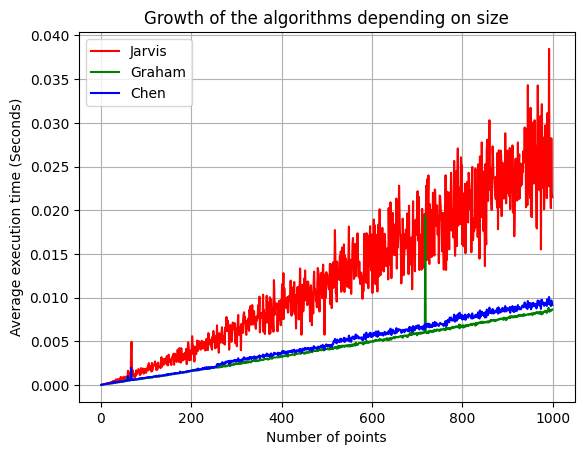

In [748]:

framework = ExperimentalFramework(50)

framework.testTimesN(10000, 1)